In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
training_df = pd.read_csv('../data/training.csv')

In [3]:
training_df.head()

,artist_familiarity,artist_hotttnesss,danceability,duration,energy,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,end_of_fade_in_relative,start_of_fade_out_relative,id
0,0.649822,0.394032,0.0,252.05506,0.0,10,0.777,-4.829,0,0.688,0.542899,87.002,4,0.940,0.008129,0.938823,0
1,0.439604,0.356992,0.0,156.55138,0.0,9,0.808,-10.555,1,0.355,0.299877,150.778,1,0.000,0.001648,0.949592,1
2,0.643681,0.437504,0.0,138.97098,0.0,7,0.418,-2.060,1,0.566,0.617871,177.768,4,0.446,0.000000,1.000000,2
3,0.448501,0.372349,0.0,145.05751,0.0,7,0.125,-4.654,1,0.451,0.000000,87.433,4,0.000,0.000000,0.956083,3
4,0.000000,0.000000,0.0,514.29832,0.0,5,0.097,-7.806,0,0.290,0.000000,140.035,4,0.315,0.000000,0.985259,4


In [4]:
training_triplets_df = pd.read_csv('../data/training_triplets.csv')

In [5]:
training_triplets_df.head()

,track_listen_count,user_id,track_id
0,1,108811,448841
1,1,83893,448841
2,1,84614,448841
3,2,98036,448841
4,4,80305,448841


In [6]:
log_count = training_triplets_df['track_listen_count'].map(lambda x: np.log(x))

In [7]:
log_count[log_count == 0].shape, log_count.shape, max(log_count)

((862354,), (1491952,), 6.8276292345028518)

(array([  8.62354000e+05,   3.19214000e+05,   1.87958000e+05,
          7.94590000e+04,   3.00420000e+04,   9.87700000e+03,
          2.44600000e+03,   5.06000000e+02,   8.70000000e+01,
          9.00000000e+00]),
 array([ 0.        ,  0.68276292,  1.36552585,  2.04828877,  2.73105169,
         3.41381462,  4.09657754,  4.77934046,  5.46210339,  6.14486631,
         6.82762923]),
 <a list of 10 Patch objects>)

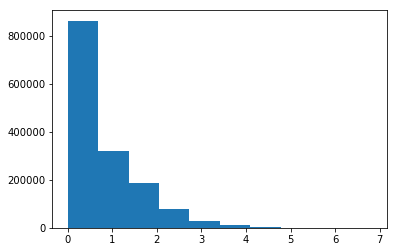

In [8]:
plt.hist(log_count)

(array([ 862354.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  629598.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

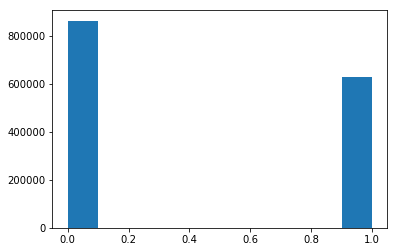

In [9]:
plt.hist(log_count.map(lambda x: 1 if x != 0. else 0))

In [10]:
listened_tracks_by_user_count = training_triplets_df.groupby(by='user_id').sum()['track_id']

In [11]:
listened_tracks_by_user_count_log = np.log(listened_tracks_by_user_count)

(array([  7.00000000e+00,   6.80000000e+01,   5.81000000e+02,
          5.34500000e+03,   2.06420000e+04,   2.83320000e+04,
          2.57170000e+04,   1.96160000e+04,   9.11300000e+03,
          5.79000000e+02]),
 array([ 12.79000188,  13.24479262,  13.69958336,  14.1543741 ,
         14.60916484,  15.06395558,  15.51874632,  15.97353706,
         16.4283278 ,  16.88311853,  17.33790927]),
 <a list of 10 Patch objects>)

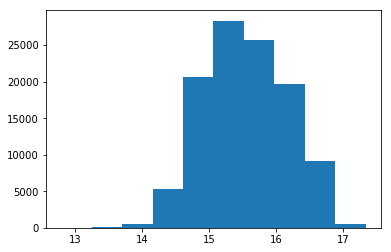

In [12]:
plt.hist(listened_tracks_by_user_count_log)

In [13]:
mean, std = listened_tracks_by_user_count_log.mean(), listened_tracks_by_user_count_log.std()

In [14]:
listened_tracks_by_user_count_log_normal = (listened_tracks_by_user_count_log - mean) / std

(array([  7.00000000e+00,   6.80000000e+01,   5.81000000e+02,
          5.34500000e+03,   2.06420000e+04,   2.83320000e+04,
          2.57170000e+04,   1.96160000e+04,   9.11300000e+03,
          5.79000000e+02]),
 array([-4.48787408, -3.74690849, -3.00594291, -2.26497732, -1.52401174,
        -0.78304616, -0.04208057,  0.69888501,  1.4398506 ,  2.18081618,
         2.92178176]),
 <a list of 10 Patch objects>)

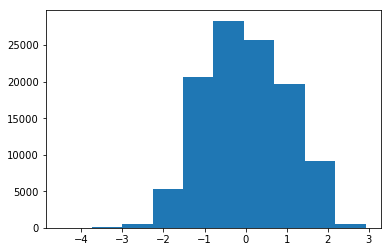

In [15]:
plt.hist(listened_tracks_by_user_count_log_normal)

In [16]:
listened_tracks_by_user_count = training_triplets_df.groupby(by='user_id').count()['track_id']

(array([  5.25330000e+04,   2.27480000e+04,   1.39420000e+04,
          9.13100000e+03,   5.77000000e+03,   3.87000000e+03,
          1.39700000e+03,   4.94000000e+02,   1.03000000e+02,
          1.20000000e+01]),
 array([  5. ,  10.2,  15.4,  20.6,  25.8,  31. ,  36.2,  41.4,  46.6,
         51.8,  57. ]),
 <a list of 10 Patch objects>)

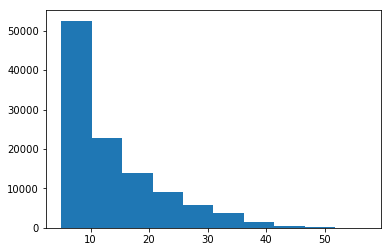

In [17]:
plt.hist(listened_tracks_by_user_count)

(array([  4.72770000e+04,   2.05210000e+04,   1.25280000e+04,
          8.20400000e+03,   5.20200000e+03,   3.47600000e+03,
          1.24500000e+03,   4.38000000e+02,   9.70000000e+01,
          1.20000000e+01]),
 array([  5. ,  10.2,  15.4,  20.6,  25.8,  31. ,  36.2,  41.4,  46.6,
         51.8,  57. ]),
 <a list of 10 Patch objects>)

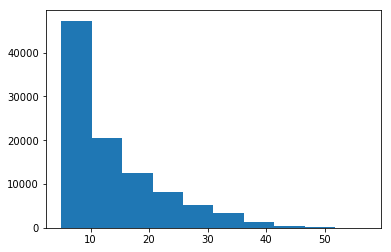

In [18]:
plt.hist(listened_tracks_by_user_count[: -int(listened_tracks_by_user_count.shape[0] * 0.1)])

In [19]:
merged_df = pd.merge(training_triplets_df, training_df, left_on='track_id', right_on='id')

In [20]:
merged_df.describe()

,track_listen_count,user_id,track_id,artist_familiarity,artist_hotttnesss,danceability,duration,energy,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,end_of_fade_in_relative,start_of_fade_out_relative,id
count,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1491952.0,1.491952e+06,1491952.0,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06
mean,3.179719e+00,5.503632e+04,5.005612e+05,7.285955e-01,5.509786e-01,0.0,2.489517e+02,0.0,5.334607e+00,4.537434e-01,-8.213840e+00,6.658029e-01,4.898975e-01,5.861277e-01,1.247204e+02,3.732686e+00,5.568243e-01,3.501899e-03,9.615961e-01,5.005612e+05
std,7.015023e+00,3.177688e+04,2.893609e+05,1.371421e-01,1.532109e-01,0.0,9.622006e+01,0.0,3.600613e+00,2.699813e-01,4.234421e+00,4.717092e-01,1.880531e-01,3.080274e-01,3.259386e+01,1.051865e+00,3.589276e-01,8.487266e-03,2.458107e-02,2.893609e+05
min,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.0,5.220000e-01,0.0,0.000000e+00,0.000000e+00,-5.164300e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.684996e-02,1.800000e+01
25%,1.000000e+00,2.745400e+04,2.468248e+05,6.410370e-01,4.510372e-01,0.0,2.006983e+02,0.0,2.000000e+00,2.460000e-01,-1.002000e+01,0.000000e+00,3.750000e-01,4.574472e-01,9.957200e+01,4.000000e+00,2.390000e-01,0.000000e+00,9.471679e-01,2.468248e+05
50%,1.000000e+00,5.510300e+04,5.009450e+05,7.534948e-01,5.353895e-01,0.0,2.341873e+02,0.0,5.000000e+00,4.700000e-01,-7.139000e+00,1.000000e+00,5.000000e-01,6.736368e-01,1.226070e+02,4.000000e+00,6.090000e-01,8.143841e-04,9.646740e-01,5.009450e+05
75%,3.000000e+00,8.255100e+04,7.559880e+05,8.359565e-01,6.143460e-01,0.0,2.768453e+02,0.0,9.000000e+00,6.520000e-01,-5.306000e+00,1.000000e+00,6.180000e-01,8.059334e-01,1.453787e+02,4.000000e+00,8.910000e-01,2.049809e-03,9.792091e-01,7.559880e+05
max,9.230000e+02,1.099990e+05,9.999880e+05,1.000000e+00,1.082503e+00,0.0,3.024666e+03,0.0,1.100000e+01,1.000000e+00,2.967000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.842080e+02,7.000000e+00,1.000000e+00,8.176242e-01,1.000169e+00,9.999880e+05


In [21]:
users_meged_df = merged_df.groupby(by='user_id').std()

In [22]:
users_meged_df.head()

,track_listen_count,track_id,artist_familiarity,artist_hotttnesss,danceability,duration,energy,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,end_of_fade_in_relative,start_of_fade_out_relative,id
user_id,,,,,,,,,,,,,,,,,,,
0,0.726483,265201.129282,0.043444,0.038527,0.0,37.190150,0.0,3.844188,0.281788,1.233524,0.440959,0.145276,0.138338,22.805048,0.000000,0.408276,0.007505,0.026507,265201.129282
1,2.750207,309763.329528,0.091141,0.032939,0.0,181.502825,0.0,3.986340,0.280970,4.214234,0.467099,0.207595,0.285836,17.589786,0.404520,0.353339,0.001342,0.014481,309763.329528
2,3.799187,324792.925607,0.093824,0.105140,0.0,65.958656,0.0,3.072650,0.254174,4.915424,0.469668,0.192284,0.380824,37.393854,0.831370,0.330918,0.007492,0.032895,324792.925607
3,0.707107,187820.140845,0.109581,0.064610,0.0,52.148778,0.0,4.085884,0.313151,3.637263,0.440959,0.247239,0.267146,43.891734,0.500000,0.257885,0.000830,0.018489,187820.140845
4,0.491869,273930.156199,0.100659,0.083457,0.0,88.199970,0.0,3.447621,0.296874,3.858517,0.507007,0.235685,0.319368,44.138687,0.856074,0.345430,0.008751,0.025945,273930.156199


In [23]:
merged_df.drop(['danceability', 'energy'], axis=1, inplace=True)

In [24]:
merged_df['tempo'] = merged_df['tempo'].map(lambda x: np.log(x + 1))

In [25]:
merged_df['duration'] = merged_df['duration'].map(lambda x: np.log(x))

In [26]:
merged_df.describe()

,track_listen_count,user_id,track_id,artist_familiarity,artist_hotttnesss,duration,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,end_of_fade_in_relative,start_of_fade_out_relative,id
count,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06,1.491952e+06
mean,3.179719e+00,5.503632e+04,5.005612e+05,7.285955e-01,5.509786e-01,5.458158e+00,5.334607e+00,4.537434e-01,-8.213840e+00,6.658029e-01,4.898975e-01,5.861277e-01,4.795717e+00,3.732686e+00,5.568243e-01,3.501899e-03,9.615961e-01,5.005612e+05
std,7.015023e+00,3.177688e+04,2.893609e+05,1.371421e-01,1.532109e-01,3.471176e-01,3.600613e+00,2.699813e-01,4.234421e+00,4.717092e-01,1.880531e-01,3.080274e-01,3.137248e-01,1.051865e+00,3.589276e-01,8.487266e-03,2.458107e-02,2.893609e+05
min,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,-6.500877e-01,0.000000e+00,0.000000e+00,-5.164300e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.684996e-02,1.800000e+01
25%,1.000000e+00,2.745400e+04,2.468248e+05,6.410370e-01,4.510372e-01,5.301803e+00,2.000000e+00,2.460000e-01,-1.002000e+01,0.000000e+00,3.750000e-01,4.574472e-01,4.610874e+00,4.000000e+00,2.390000e-01,0.000000e+00,9.471679e-01,2.468248e+05
50%,1.000000e+00,5.510300e+04,5.009450e+05,7.534948e-01,5.353895e-01,5.456121e+00,5.000000e+00,4.700000e-01,-7.139000e+00,1.000000e+00,5.000000e-01,6.736368e-01,4.817107e+00,4.000000e+00,6.090000e-01,8.143841e-04,9.646740e-01,5.009450e+05
75%,3.000000e+00,8.255100e+04,7.559880e+05,8.359565e-01,6.143460e-01,5.623459e+00,9.000000e+00,6.520000e-01,-5.306000e+00,1.000000e+00,6.180000e-01,8.059334e-01,4.986197e+00,4.000000e+00,8.910000e-01,2.049809e-03,9.792091e-01,7.559880e+05
max,9.230000e+02,1.099990e+05,9.999880e+05,1.000000e+00,1.082503e+00,8.014556e+00,1.100000e+01,1.000000e+00,2.967000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.653219e+00,7.000000e+00,1.000000e+00,8.176242e-01,1.000169e+00,9.999880e+05


In [27]:
attributes = ['artist_familiarity', 'artist_hotttnesss', 'duration', 
              'key', 'key_confidence', 'loudness', 'song_hotttnesss',
              'tempo', 'end_of_fade_in_relative', 'start_of_fade_out_relative',
              'loudness']

In [28]:
for attr in attributes:
    mean = merged_df[attr].mean()
    std = merged_df[attr].std()
    merged_df[attr] = merged_df[attr].apply(lambda x: (x - mean) / std)

In [29]:
users_meged_df = merged_df.groupby(by='user_id').std()

In [30]:
users_meged_df.describe()

,track_listen_count,track_id,artist_familiarity,artist_hotttnesss,duration,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,end_of_fade_in_relative,start_of_fade_out_relative,id
count,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000,110000.000000
mean,3.194263,284767.852472,0.858051,0.813997,0.897697,0.981949,0.969217,0.868341,0.454094,0.179036,0.920267,0.857460,0.935701,0.345626,0.713346,0.935156,284767.852472
std,5.731422,50127.499737,0.363835,0.365457,0.405007,0.170635,0.201751,0.378156,0.110133,0.046424,0.281878,0.512066,0.468734,0.067080,0.679845,0.291439,50127.499737
min,0.000000,25240.313686,0.000000,0.000000,0.032183,0.000000,0.074697,0.037944,0.000000,0.006841,0.000000,0.036945,0.000000,0.000000,0.000000,0.000050,25240.313686
25%,0.621582,257603.362407,0.630475,0.549886,0.628662,0.890719,0.851222,0.606228,0.439941,0.148753,0.775664,0.667543,0.534522,0.312364,0.326845,0.758121,257603.362407
50%,1.631020,287847.454454,0.838030,0.788893,0.835698,0.993400,0.976587,0.815333,0.487950,0.178524,0.962106,0.790384,1.013794,0.353340,0.601163,0.920688,287847.454454
75%,3.563706,315646.858360,1.050020,1.040732,1.086391,1.086687,1.095442,1.065084,0.516398,0.208019,1.109091,0.925990,1.264911,0.388701,0.917003,1.087393,315646.858360
max,251.416041,499594.640718,3.145997,2.875507,7.604808,1.673312,1.908993,3.867063,0.547723,0.436608,1.778162,7.917381,3.286335,0.547723,29.279200,11.252159,499594.640718


In [31]:
users_meged_df_median = merged_df[merged_df['track_listen_count'] > 1].groupby(by='user_id').median()

In [32]:
users_meged_df_median.head()

,track_listen_count,track_id,artist_familiarity,artist_hotttnesss,duration,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,end_of_fade_in_relative,start_of_fade_out_relative,id
user_id,,,,,,,,,,,,,,,,,
0,2.0,657614.0,0.441214,-0.114581,-0.248456,0.184800,-0.017569,0.535100,1.0,0.595,0.585323,0.442405,4.0,0.705,-0.412606,-0.793370,657614.0
1,4.0,373834.0,-0.688253,-0.292737,1.176224,1.295722,0.797302,0.305553,0.0,0.678,0.864469,-0.255709,4.0,0.767,-0.412606,0.635488,373834.0
2,5.0,373257.0,0.141165,-0.118236,0.015583,-0.092931,0.326899,-0.427723,1.0,0.597,0.841117,0.144218,4.0,0.783,-0.209344,-0.454142,373257.0
3,2.5,622848.5,0.319392,-0.130751,0.286642,-0.509526,0.336159,-0.236434,1.0,0.644,-1.902843,-0.517561,4.0,0.656,-0.315783,-0.635268,622848.5
4,2.0,515491.0,-0.526070,-0.467140,0.312796,0.045935,-0.780585,0.041999,0.0,0.452,0.007985,0.056878,4.0,0.638,-0.385587,0.169218,515491.0


In [33]:
users_meged_df_median.drop(['track_listen_count', 'track_id', 'id',
                            'mode', 'mode_confidence',
                            'time_signature', 'time_signature_confidence'], axis=1, inplace=True)

In [34]:
users_meged_df_median.head()

,artist_familiarity,artist_hotttnesss,duration,key,key_confidence,loudness,song_hotttnesss,tempo,end_of_fade_in_relative,start_of_fade_out_relative
user_id,,,,,,,,,,
0,0.441214,-0.114581,-0.248456,0.184800,-0.017569,0.535100,0.585323,0.442405,-0.412606,-0.793370
1,-0.688253,-0.292737,1.176224,1.295722,0.797302,0.305553,0.864469,-0.255709,-0.412606,0.635488
2,0.141165,-0.118236,0.015583,-0.092931,0.326899,-0.427723,0.841117,0.144218,-0.209344,-0.454142
3,0.319392,-0.130751,0.286642,-0.509526,0.336159,-0.236434,-1.902843,-0.517561,-0.315783,-0.635268
4,-0.526070,-0.467140,0.312796,0.045935,-0.780585,0.041999,0.007985,0.056878,-0.385587,0.169218


In [35]:
merged_df.drop(['mode', 'mode_confidence', 
                'time_signature', 'time_signature_confidence', 
                'id'], axis=1, inplace=True)

### merged_df.head()

In [37]:
def cosine_recommendation(x, y):
    len_x = np.sqrt(np.sum(np.power(x, 2)))
    len_y = np.sqrt(np.sum(np.power(y, 2)))
    
    return abs(np.sum(x * y) / (len_x * len_y))

In [38]:
def l2_recommendation(x, y):
    return np.sqrt(np.sum(np.power((x - y), 2)))

In [39]:
x = merged_df.iloc[4]

In [40]:
x = x.drop(['user_id', 'track_listen_count', 'track_id'])

In [41]:
x

artist_familiarity            0.341067
artist_hotttnesss            -0.237642
duration                      0.056438
key                           0.462530
key_confidence                2.023313
loudness                     -0.220139
song_hotttnesss              -0.356113
tempo                        -0.712715
end_of_fade_in_relative      -0.279671
start_of_fade_out_relative   -0.857802
Name: 4, dtype: float64

In [42]:
y = users_meged_df_median.iloc[80305]

In [43]:
y

artist_familiarity            0.881654
artist_hotttnesss             0.451946
duration                      0.127260
key                          -0.648392
key_confidence                0.763966
loudness                      0.256904
song_hotttnesss               0.564650
tempo                         0.344894
end_of_fade_in_relative      -0.219006
start_of_fade_out_relative   -0.206864
Name: 88653, dtype: float64

In [44]:
cosine_recommendation(x, y)

0.29984325238830106

In [45]:
l2_recommendation(x, y)

2.4928281956434204

In [46]:
import xgboost as xgb

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [47]:
val_size = int(merged_df.shape[0] * 0.1)

In [48]:
merged_df = merged_df.reindex(np.random.permutation(merged_df.shape[0]))

In [49]:
merged_df['label'] = merged_df['track_listen_count'].map(lambda x: 1 if x > 1 else 0)

In [50]:
merged_df.drop('track_listen_count', axis=1, inplace=True)

In [51]:
merged_df_final = pd.merge(merged_df, users_meged_df_median, 
                           left_on='user_id', right_index=True)

In [52]:
train, val = merged_df_final.iloc[:-val_size],  merged_df_final.iloc[-val_size:]

In [53]:
train.drop(['user_id', 'track_id'], axis=1, inplace=True)

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
val.drop(['user_id', 'track_id'], axis=1, inplace=True)

/Users/alexkirnas/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [55]:
train_x, train_y = train.drop('label', axis=1), train['label']

In [56]:
val_x, val_y = val.drop('label', axis=1), val['label']

In [197]:
gbm = xgb.XGBClassifier(n_estimators=30, learning_rate=0.3, max_depth=14,
                        subsample=0.8, colsample_bytree=0.9, reg_lambda=0.00005)

In [198]:
gbm

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=14,
       min_child_weight=1, missing=None, n_estimators=30, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=5e-05,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [199]:
gbm.fit(train_x, train_y)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=14,
       min_child_weight=1, missing=None, n_estimators=30, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=5e-05,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8)

In [200]:
y_pred_val = gbm.predict(val_x)

In [201]:
y_pred_train = gbm.predict(train_x)

In [202]:
from sklearn.metrics import accuracy_score

In [203]:
accuracy_score(train_y, y_pred_train, normalize=True), accuracy_score(val_y, y_pred_val, normalize=True)

(0.83105234110636017, 0.79665538389356216)

In [204]:
import pickle

In [205]:
with open('../data/model.pkl', 'wb') as file:
    pickle.dump(gbm, file)